# Image Compression Using KNN
I learned this from Andrew Ng's course on Unsupervised Learning

### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

### Data Collection

Picture to compress


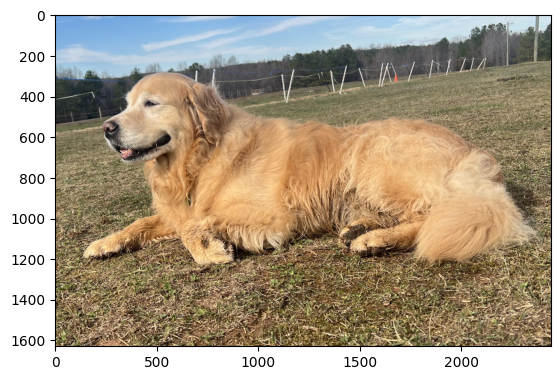

In [2]:
pic = plt.imread("/kaggle/input/goodboy-jpeg/boaz.jpg")
plt.imshow(pic)
print("Picture to compress")

### Creating and Demonstrating functions for KNN

In [3]:
def find_closest_center(X,centers):
    """
    X: np.array (data points)
    conters: np.array (current position of the centers)
    
    returns:
    ans: np.array (assigns all the points to a center)
    """
    K = len(centers)
    ans = [] #where assigned centers will be stored
    for i in X:
        dis = []
        for e in centers:
            norm = np.linalg.norm(np.array(e) - np.array(i)) #distance between points
            dis.append(norm) 
        ans.append(dis.index(min(dis))) #find minimum distance
    return ans

In [4]:
testCaseX = [[3,3], [-6,-2], [8,5]]
testCaseCenters = [[8,8],[1,3]]
find_closest_center(testCaseX,testCaseCenters)
#testing it

[1, 1, 0]

In [5]:
def compute_centroids(X,idx,K):
    """
    X: np.array (data points)
    idx: np.array (the assigned centers for every data points)
    K: int (number of centers)
    
    returns:
    ans: np.array (new position for all centers, avarged by their closest points)
    """
    X = np.array(X)
    idx = np.array(idx)
    ans = [] # where points position will be stored
    for i in range(K):
        closest = X[idx == i] #all points assigned to the current center
        ans.append(np.mean(closest,axis = 0)) #avarage of the points
    return ans

In [6]:
testCaseX = [[3,3], [-6,-2], [8,5]]
testCaseidx = [1,1,0]
testCaseK = 2
compute_centroids(testCaseX,testCaseidx,testCaseK)
#testing it

[array([8., 5.]), array([-1.5,  0.5])]

In [7]:
#you can use other np.arrays to filter arrays
example_data = np.array([1,2,3,4,5,6,7,8,9,10])
cut_data =     np.array([1,1,1,1,1,0,0,0,0,0])
example_data[cut_data == 1]
#for this to work, the data HAS to be np.array

array([1, 2, 3, 4, 5])

In [8]:
def find_random_points(pos,centers):
    """
    pos: np.array(np.array()) (all data points position)
    centers: int (number of centers)
    
    returns:
    ans: np.array() (initialzes the centers position by taking a random point on pos)
    """
    ans = [] #where new center positions are stored
    uniq = [] #makes sure all positions are unique
    for i in range(centers):
        while True:
            temp = random.randint(0,len(pos))#find a random point
            
            if temp not in uniq:#if not in ans
                ans.append(pos[temp])
                uniq.append(temp)
                break
    return ans

### Example of KNN / Data Visualization

[[5.562510580715969, 5.321690060146125], [7.582316724714839, 2.110004015985794], [4.516422149687212, 6.887279081680588]]
These are the clusters:


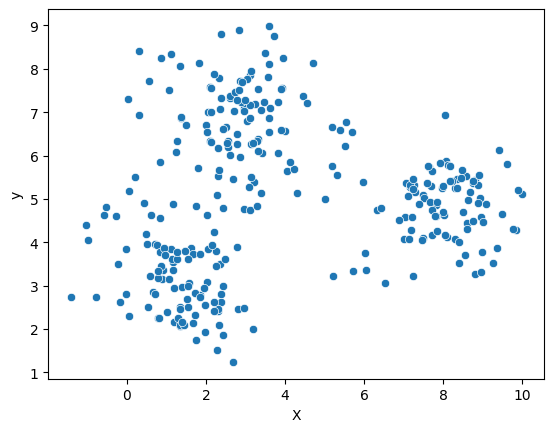

In [9]:
pos = []
X = []
y = []
center = [[5,8],[7,3],[3,1.5]]
radius = 1
examples = 100
#adding random points to test the KNN Algorithm
for e in center:
    for i in range(examples):
        temp = []
        if random.randint(0,1):
            temp.append(e[0] + random.uniform(-radius,radius)) 
            temp.append(e[1] + random.uniform(-radius,radius)) 
        else:
            temp.append(e[0] + random.uniform(-(radius + 1),radius + 1)) 
            temp.append(e[1] + random.uniform(-(radius + 2),radius + 1))
        pos.append(temp)
        X.append(temp[0])
        y.append(temp[1])
import seaborn as sns
test_data = pd.DataFrame(X,y).reset_index().rename(columns = {"index":"X",0:"y"})
sns.scatterplot(data = test_data,x = "X",y ="y")
print(find_random_points(pos,3))
print("These are the clusters:")


In [10]:
#making centers
centers = find_random_points(pos,3)#initialize points randomly

#training data
for i in range(25):#15 times to find clusters
    inx = find_closest_center(pos,centers)
    centers = compute_centroids(pos,inx,len(centers))
    
#points come out reverse, so this reverses it again
for x in range(len(centers)):
    centers[x] = centers[x][::-1]
print(centers)

[array([1.28699554, 3.22257478]), array([2.94105748, 6.82488756]), array([7.99972875, 4.79103675])]


Blue dots are data, and orange dots are the three groups that the computer could find


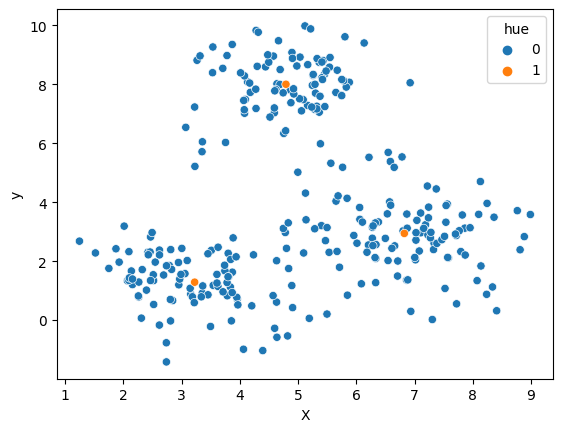

In [11]:
#creating dataset for data visualization
X = list(test_data["X"])
y = list(test_data["y"])
hue = ([0] * len(X)) + ([1] * 3) #makes points orange to see where the centers end up
for i in centers:
    X.append(i[0])
    y.append(i[1])
data = pd.DataFrame(X,y).reset_index().rename(columns = {"index":"X",0:"y"})
data["hue"] = hue
sns.scatterplot(data,x = "X",y = "y",hue = "hue")
print("Blue dots are data, and orange dots are the three groups that the computer could find")

### Data Processing

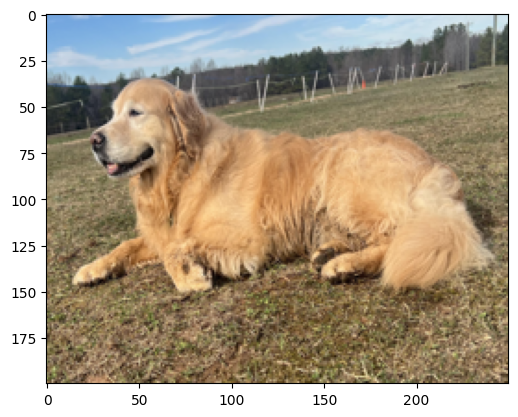

In [12]:
from PIL import Image 
pic = Image.open("/kaggle/input/goodboy-jpeg/boaz.jpg")
pic = pic.resize((250,200))#the training takes forever if the file isnt resized
pic = np.array(pic)
plt.imshow(pic)
proc = np.array(np.reshape(pic, (pic.shape[0] * pic.shape[1],3)))

In [13]:
#Initializing centers
K = 16
pos_c = find_random_points(proc,K)
pos_c
#these are the 16 colors that will be fine-tuned to match the photo

[array([181, 163, 131], dtype=uint8),
 array([180, 164, 122], dtype=uint8),
 array([128, 178, 226], dtype=uint8),
 array([130, 178, 226], dtype=uint8),
 array([121, 110,  76], dtype=uint8),
 array([179, 203, 222], dtype=uint8),
 array([224, 179, 133], dtype=uint8),
 array([142, 124,  94], dtype=uint8),
 array([213, 172, 128], dtype=uint8),
 array([138, 127, 111], dtype=uint8),
 array([115,  92,  52], dtype=uint8),
 array([135, 129, 123], dtype=uint8),
 array([158, 197, 230], dtype=uint8),
 array([ 95, 101, 102], dtype=uint8),
 array([144, 126,  86], dtype=uint8),
 array([97, 95, 93], dtype=uint8)]

### Training model

In [14]:
centers = pos_c
iterations = 10
#training data
for i in range(iterations):
    inx = find_closest_center(proc,centers)
    centers = compute_centroids(proc,inx,len(centers))
    print(str(i) +"/"+ str(iterations))#this takes some time,here is a counter
print(centers)
inx = find_closest_center(proc,centers)
#ensures all points are assigned to one of the 16 colors

0/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
[array([170.44324688, 148.54294375, 114.07308858]), array([152.70982318, 133.68192534, 100.08467583]), array([197.97329518, 167.14353839, 130.24940391]), array([141.01322168, 184.53018951, 225.50242398]), array([99.69560614, 78.77474854, 49.49682372]), array([187.91450634, 212.03254275, 229.57887479]), array([225.06778309, 174.53880914, 120.64167996]), array([141.5103697 , 120.28890893,  85.69738503]), array([198.76055891, 145.28485233,  94.84058431]), array([123.27087895, 111.91898655,  82.11729747]), array([154.05008945, 160.94275492, 160.84078712]), array([109.40997567, 110.8649635 , 109.26034063]), array([235.0666839 , 196.56112691, 147.71543034]), array([79.55607676, 81.08742004, 79.3249467 ]), array([122.3359586 ,  99.32358236,  65.84518452]), array([54.03065752, 49.28196854, 41.30173457])]


In [15]:
pixels = []
for i in range(len(proc)):
    pixels.append(np.array(centers[inx[i]]))#assigning all points to color
pixels = np.reshape(pixels,(200,250,3))#reshaping data
pixels = np.array(pixels,dtype = np.uint8)#making all data integers
pixels[1][1]

array([141, 184, 225], dtype=uint8)

## Final Photo

This photo has only 16 colors in it


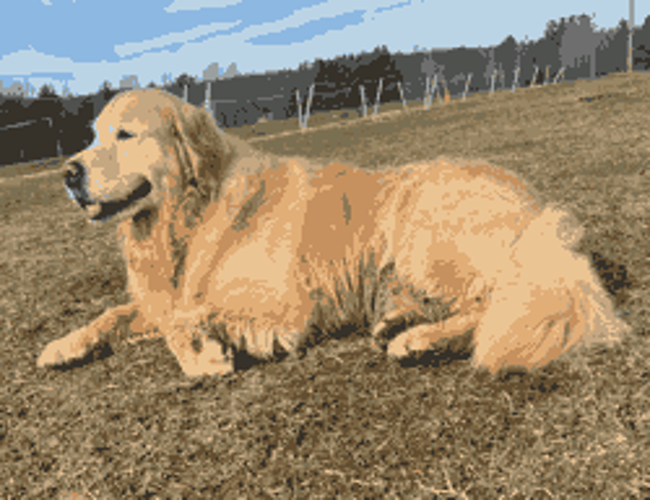

In [16]:
print("This photo has only 16 colors in it")
pic = Image.fromarray(pixels)
pic.resize((650,500))